In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [3]:
# Iba na zaklade Weight, Height
Y = data["Gender"]
X = data[["Weight", "Height"]]

# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
X_train

Weight  Height
1504    73.2     159
1365    60.1     162
1698   103.6     182
3864    89.8     157
1105   100.8     180
...      ...     ...
3826    71.6     160
1249    98.6     172
4972    60.7     164
1128    91.2     173
3674    89.4     172

[3982 rows x 2 columns]

In [4]:
# Logisticka regresia
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# intercept, Weight, Height
print(logreg.intercept_, logreg.coef_)
print(np.exp(logreg.coef_))

[-40.79511454] [[-0.00603987  0.24609518]]
[[0.99397833 1.27902131]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Height')

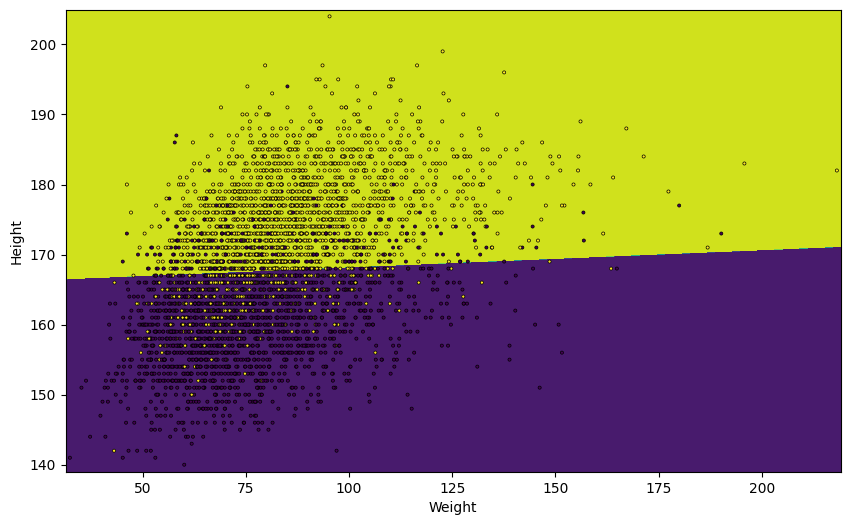

In [5]:
# Rozhodovacia hranica
x_min, x_max = X_train["Weight"].min() - 1, X_train["Weight"].max() + 1
y_min, y_max = X_train["Height"].min() - 1, X_train["Height"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train["Weight"], X_train["Height"], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
# S kvadratickymi clenmi (a interakciou)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Logisticka regresia
logreg2 = LogisticRegression()
logreg2.fit(X_train_poly, y_train)

X_train_poly

array([[   73.2 ,   159.  ,  5358.24, 11638.8 , 25281.  ],
       [   60.1 ,   162.  ,  3612.01,  9736.2 , 26244.  ],
       [  103.6 ,   182.  , 10732.96, 18855.2 , 33124.  ],
       ...,
       [   60.7 ,   164.  ,  3684.49,  9954.8 , 26896.  ],
       [   91.2 ,   173.  ,  8317.44, 15777.6 , 29929.  ],
       [   89.4 ,   172.  ,  7992.36, 15376.8 , 29584.  ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Height')

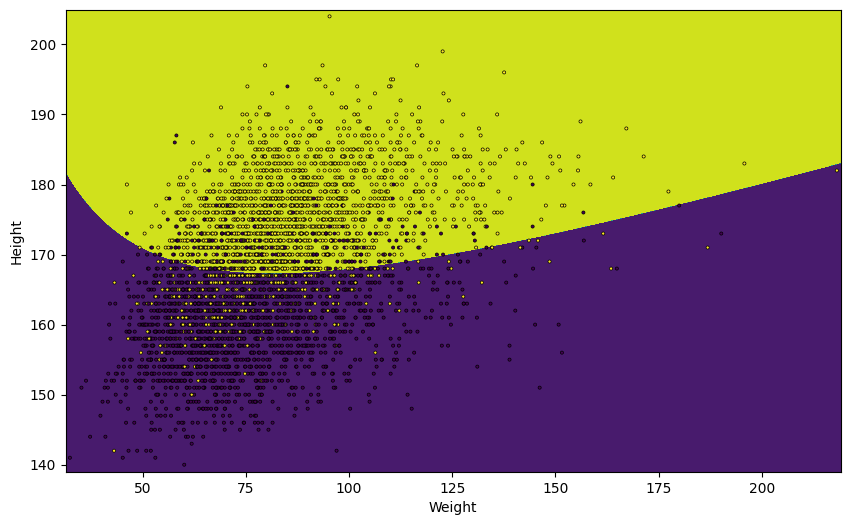

In [9]:
# Rozhodovacia hranica
x_min, x_max = X_train["Weight"].min() - 1, X_train["Weight"].max() + 1
y_min, y_max = X_train["Height"].min() - 1, X_train["Height"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
XX_train = np.c_[xx.ravel(), yy.ravel()]
Z = logreg2.predict(poly.transform(XX_train))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train["Weight"], X_train["Height"], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
# Kvalita predikcie (1. model)
y_pred = logreg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
conf_matrix = confusion_matrix(y_val, y_pred)

print(accuracy)
print(conf_matrix) # viac o mierach kvality: cvicenia

0.8152610441767069
[[407  87]
 [ 97 405]]


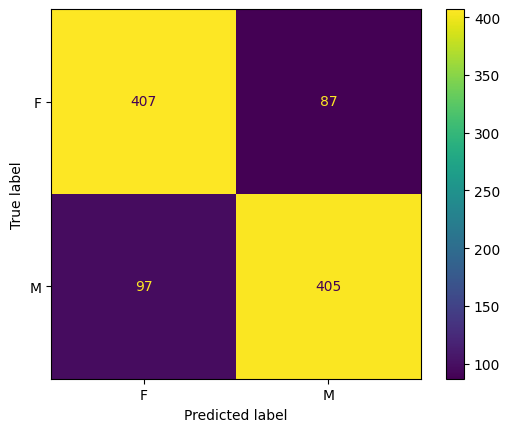

In [11]:
# Vykreslenie
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()

accuracy: 0.8283132530120482


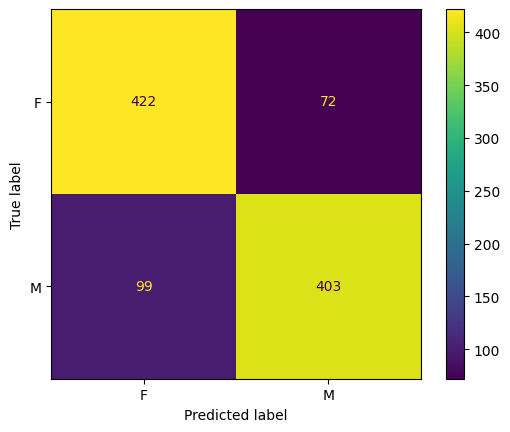

In [12]:
# Pre kvadraticky model
y_pred = logreg2.predict(X_val_poly)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("accuracy:", accuracy)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["F", "M"])
cm_display.plot()

In [ ]:
# Dobrovolna DU:
# A. Vyskusajte dalsie premenne.
# B. Vyskusajte data standardizovat: ako sa zmenia odhady parametrov a ako sa zmenia predikcie?